In [1]:
import logging

import numpy as np

import networkx as nx
from matplotlib import pyplot as plt

from broadcastStorm import Message, Node, Network

from util import sutup_logger, mean, add_random_msgs

In [2]:
logger = sutup_logger()

### Third task
3) оцінити необхідний час життя допоміжних структур для протоколу, що Ви побудували у п. 2;

Lets now generate a bigger graph

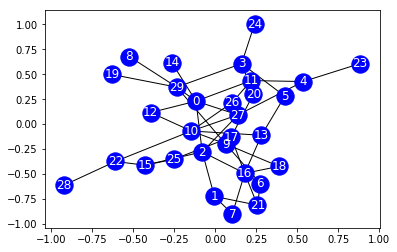

In [26]:
N_NODES = 30

g = nx.gnp_random_graph(N_NODES, 0.1)
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_color='b', node_size=300)
nx.draw_networkx_labels(g, pos, font_color='w', font_size=12)
nx.draw_networkx_edges(g, pos)
plt.show()

Create a network with this graph and disable logging since there are going to be lots of messages

lets set ```keep_history``` equal to number of nodes ```N_NODES``` in the network and verify if its enough

In [27]:
network = Network(g, logger, keep_history=N_NODES)
network.logger.setLevel(logging.ERROR)

lets create some random messages

In [28]:
N_MSGS = 50 # number of messages to be created

add messages to the network

In [29]:
add_random_msgs(N_MSGS, network)

Since we are going to experiment with ```keep_history``` paramtere, we need to be able to stop the program at some point. Suppose that network shuts down when number of messages in the network exceeds ```MAX_MESSAGES```

In [30]:
MAX_MESSAGES = N_NODES * N_MSGS
MAX_MESSAGES

1500

In [31]:
n_msgs = N_MSGS

# lets store history of messages in the network
n_msgs_history = [n_msgs]

n_steps = 0
# while there are messages in the network, and network is operating
print("Number of messages in the system after {} steps is {}".format(n_steps, n_msgs))

while n_msgs < MAX_MESSAGES and n_msgs > 0:
    n_msgs = network.simulate_one_step()
    
    n_msgs_history.append(n_msgs)
    
    n_steps += 1
    print("Number of messages in the system after {} steps is {}".format(n_steps, n_msgs))
    
if n_msgs == 0:
    print("Success!")
else:
    print("Fail! Broadcast storm!")

Number of messages in the system after 0 steps is 50
Number of messages in the system after 1 steps is 302
Number of messages in the system after 2 steps is 195
Number of messages in the system after 3 steps is 31
Number of messages in the system after 4 steps is 1
Number of messages in the system after 5 steps is 0
Success!


make sure that every message was deliverd

In [32]:
len(network.hop_time) == N_MSGS

True

We can see that ```N_NODES``` history length is enough, but what will happen if we set ```keep_history``` to some small value

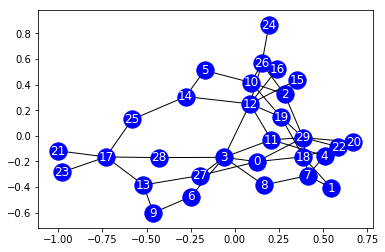

In [39]:
N_NODES = 30

g = nx.gnp_random_graph(N_NODES, 0.1)
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_color='b', node_size=300)
nx.draw_networkx_labels(g, pos, font_color='w', font_size=12)
nx.draw_networkx_edges(g, pos)
plt.show()

For example, let ```keep_history = 1 ```

In [42]:
network = Network(g, logger, keep_history=1)
network.logger.setLevel(logging.ERROR)

In [43]:
add_random_msgs(N_MSGS, network)

Since we are going to experiment with ```keep_history``` paramtere, we need to be able to stop the program at some point. Suppose that network shuts down when number of messages in the network exceeds ```MAX_MESSAGES```

In [44]:
MAX_MESSAGES = N_NODES * N_MSGS
MAX_MESSAGES

1500

In [45]:
n_msgs = N_MSGS

# lets store history of messages in the network
n_msgs_history = [n_msgs]

n_steps = 0
# while there are messages in the network, and network is operating
print("Number of messages in the system after {} steps is {}".format(n_steps, n_msgs))

while n_msgs < MAX_MESSAGES and n_msgs > 0:
    n_msgs = network.simulate_one_step()
    
    n_msgs_history.append(n_msgs)
    
    n_steps += 1
    print("Number of messages in the system after {} steps is {}".format(n_steps, n_msgs))
    
if n_msgs == 0:
    print("Success!")
else:
    print("Fail! Broadcast storm!")

Number of messages in the system after 0 steps is 50
Number of messages in the system after 1 steps is 310
Number of messages in the system after 2 steps is 1573
Fail! Broadcast storm!


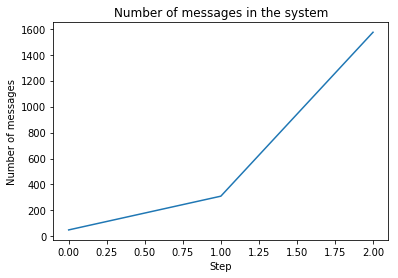

In [46]:
plt.plot(n_msgs_history)
plt.title("Number of messages in the system")
plt.xlabel("Step")
plt.ylabel("Number of messages")
plt.show()

We can see that ```keep_history = 1 ``` is not enough

### Fourth task
4) удосконалити модель п.2, забезпечивши своєчасне видалення допоміжних структур.

Fourth task is implemented in broadcastStorm.py file lines 66-77
in class Node 